In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from compotime import LocalTrendForecaster, preprocess

In [2]:
def plot_time_series(
    time_series: pd.DataFrame,
    fitted_curve: pd.DataFrame = None,
    predictions: pd.DataFrame = None,
    num_series: int = None,
) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (name, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(10, 7), label=name)
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--", label="")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":", label="")

    if predictions is not None:
        plt.axvline(predictions.index[0], color="red", linestyle="--")

    plt.subplots_adjust(right=0.8)  # Adjust the right margin to make room for the legend
    plt.show()

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def simulate_ts(r: int, length: int, noise_std=0.025) -> pd.DataFrame:
    start = np.random.normal(0, 3, r)
    end = np.random.normal(0, 3, r)
    slope = (end - start) / length

    time_series = np.arange(length)[:, np.newaxis] * slope + start
    time_series += np.random.normal(0, noise_std, time_series.shape)
    time_series = sigmoid(time_series)
    return pd.DataFrame(time_series / time_series.sum(axis=1)[:, np.newaxis])

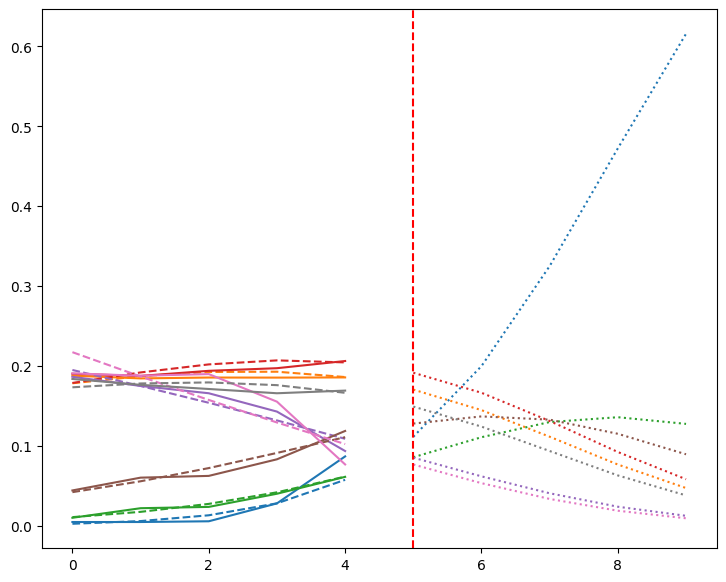

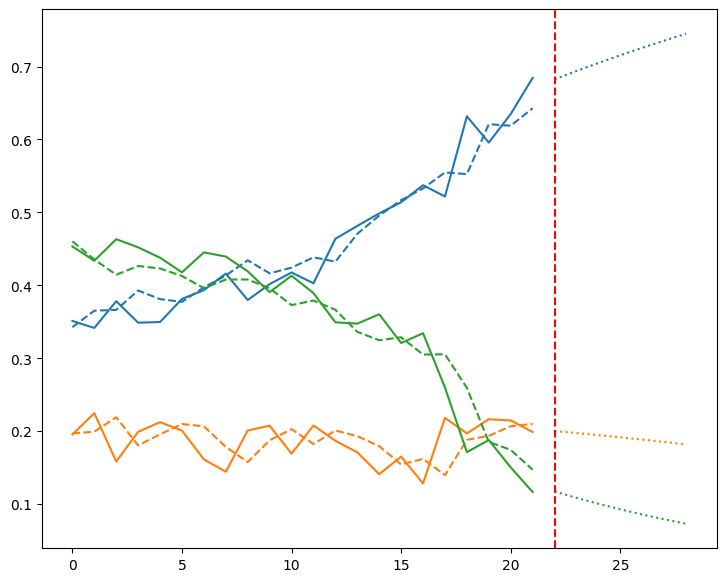

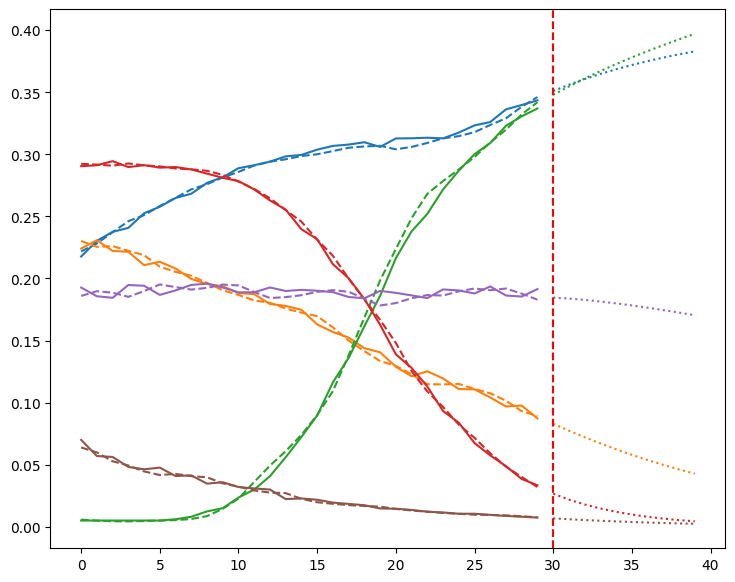

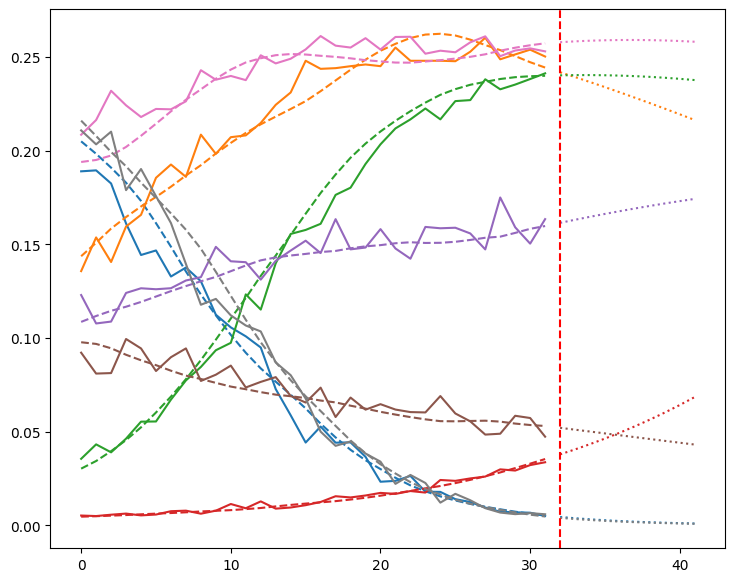

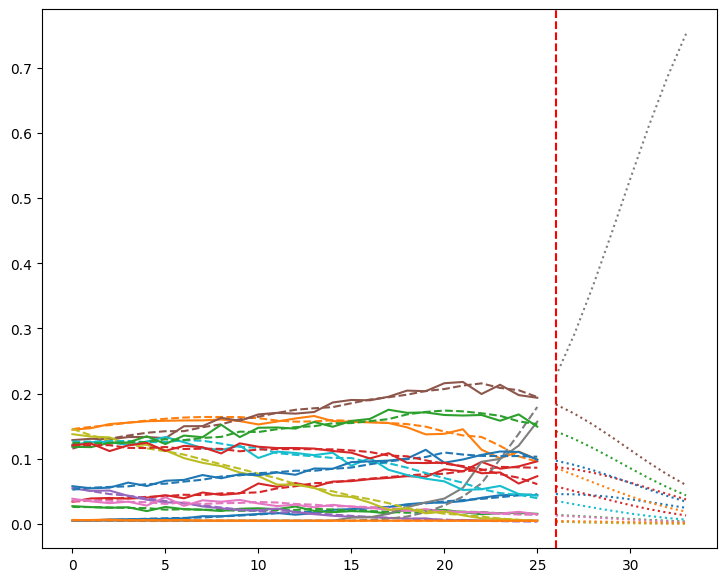

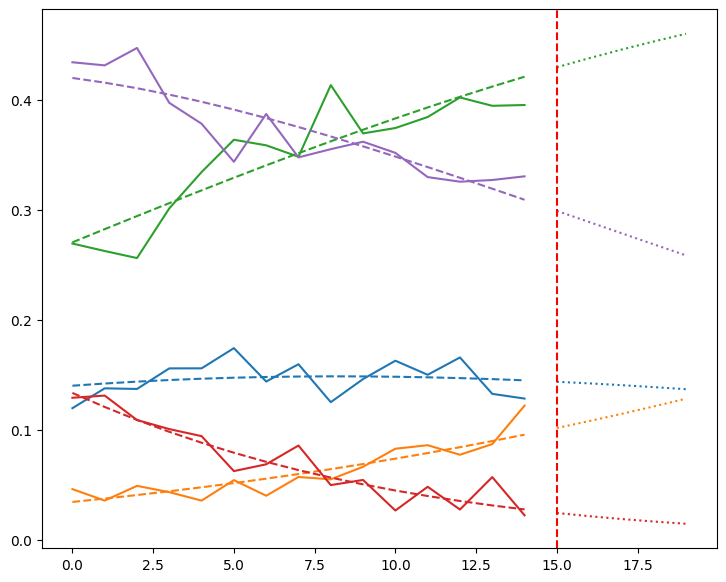

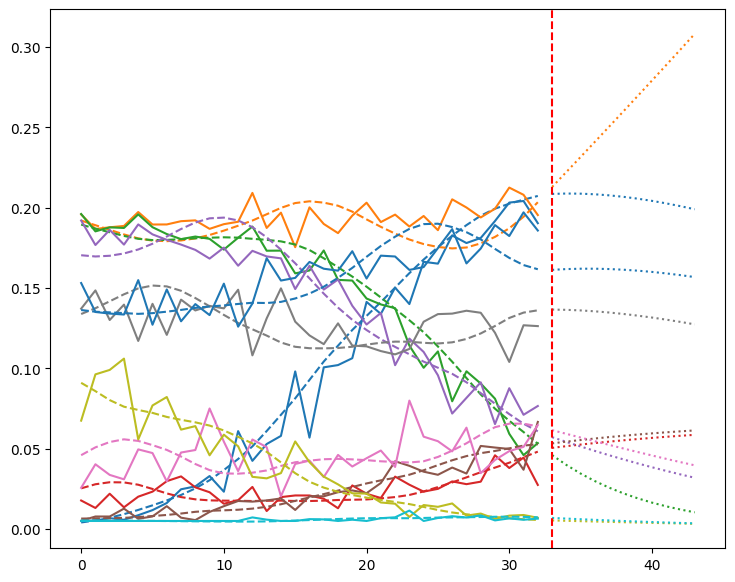

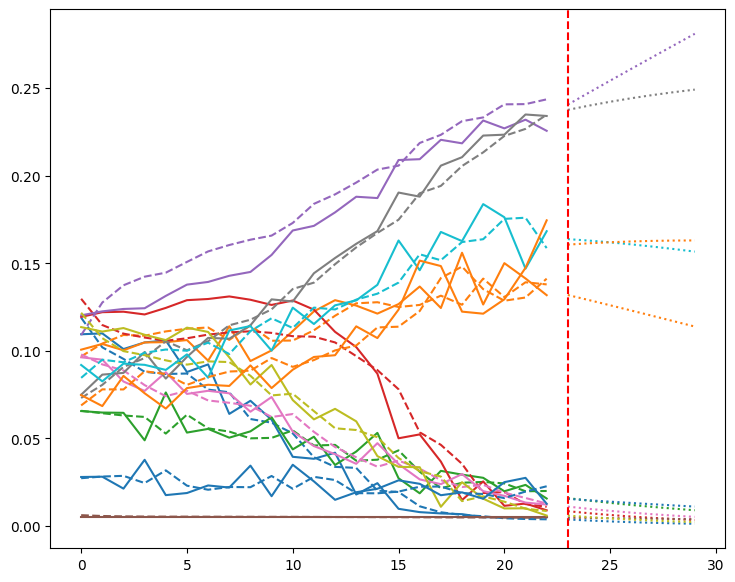

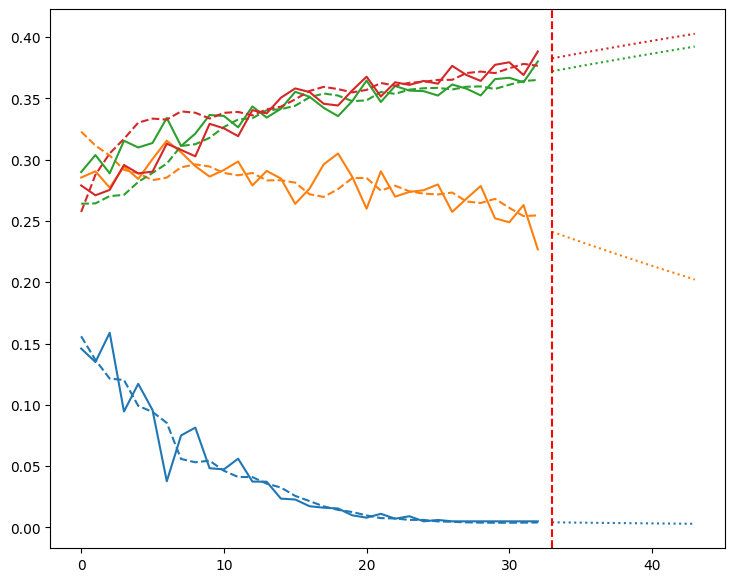

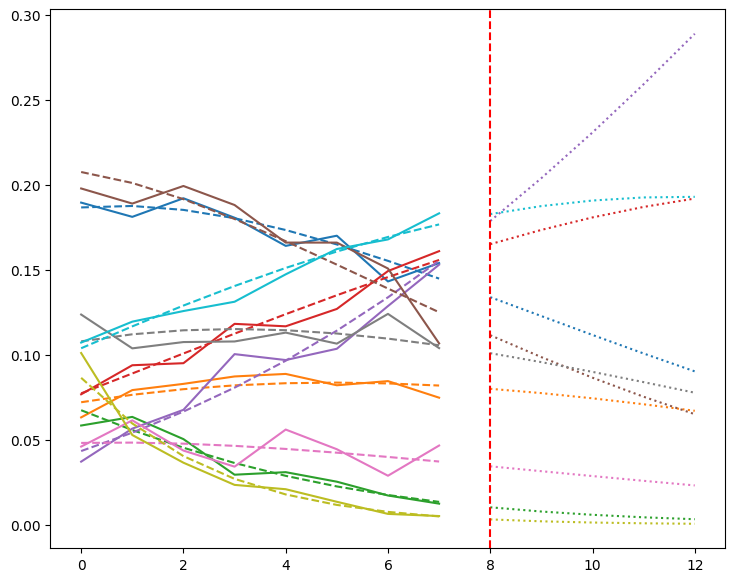

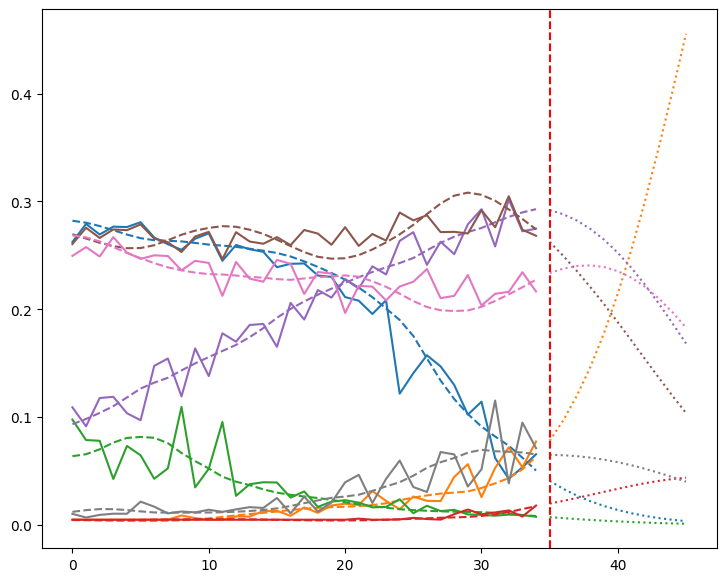

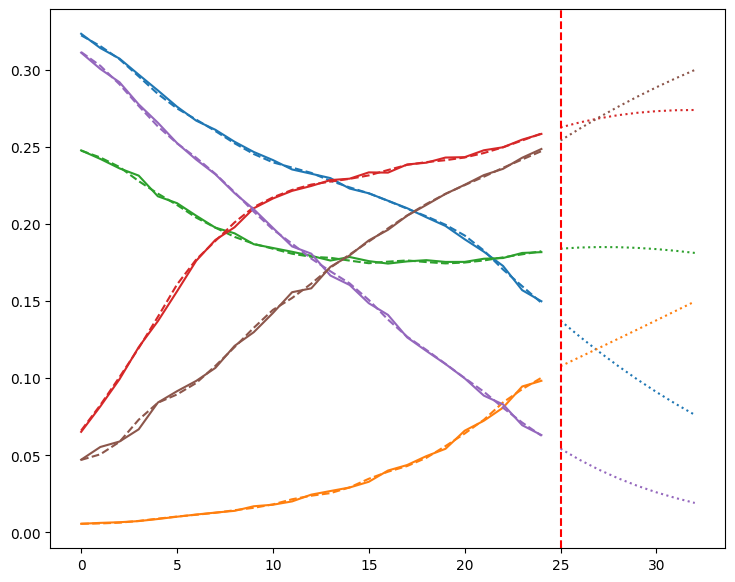

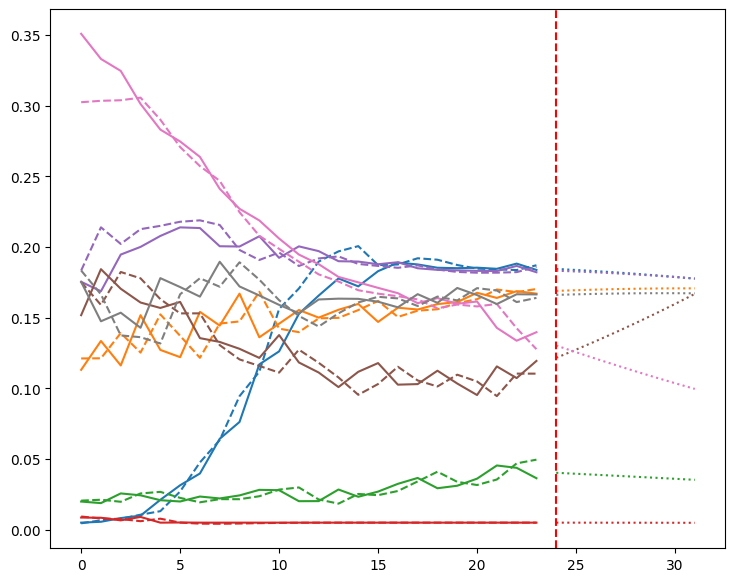

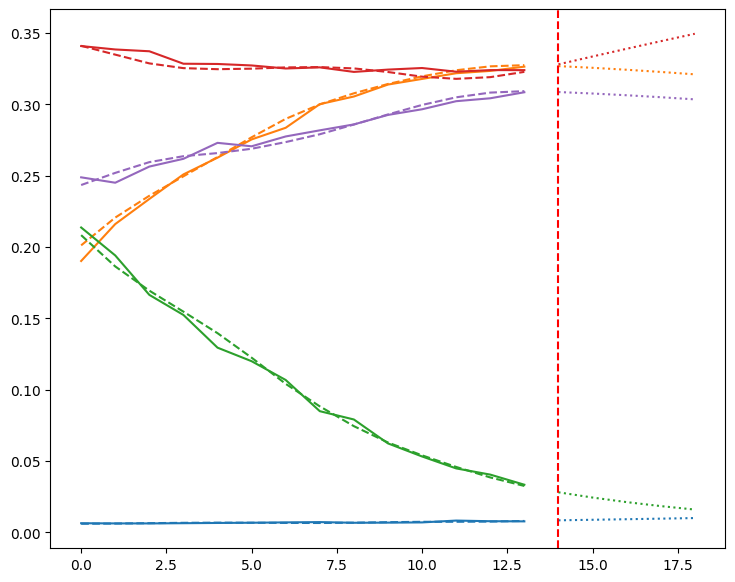

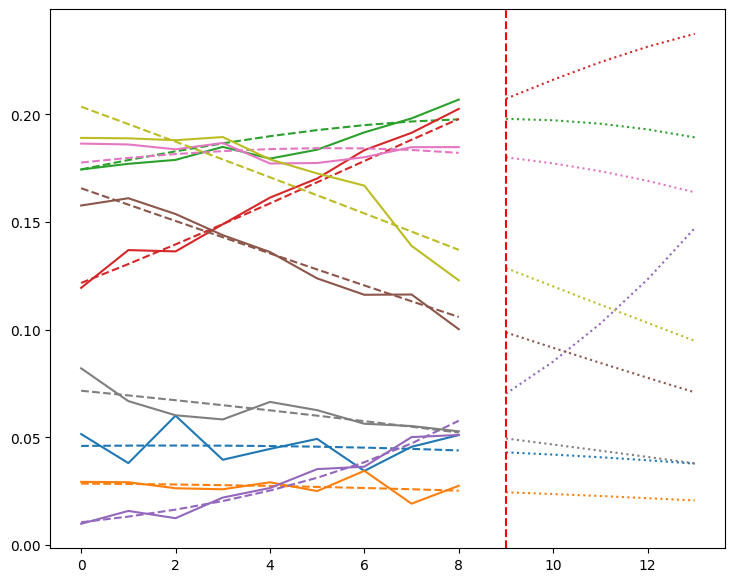

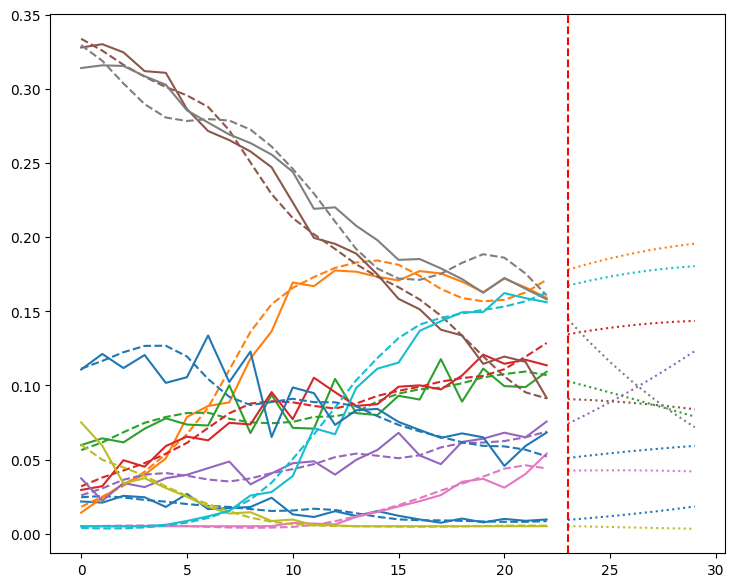

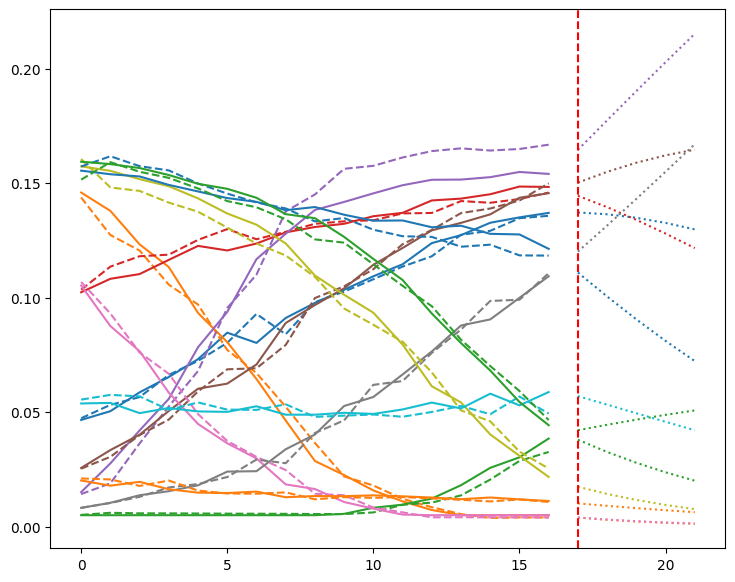

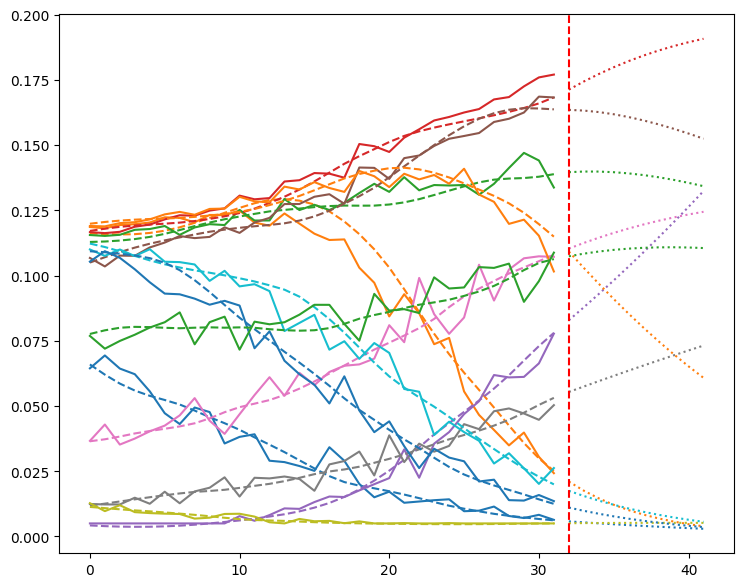

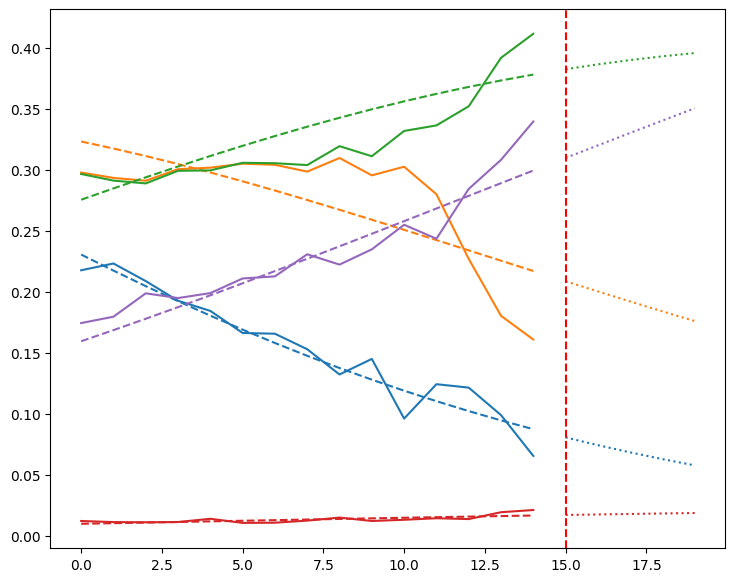

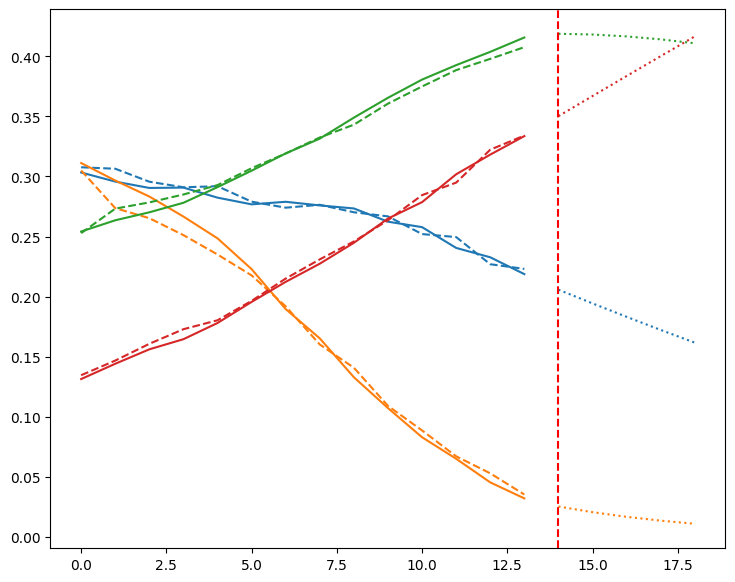

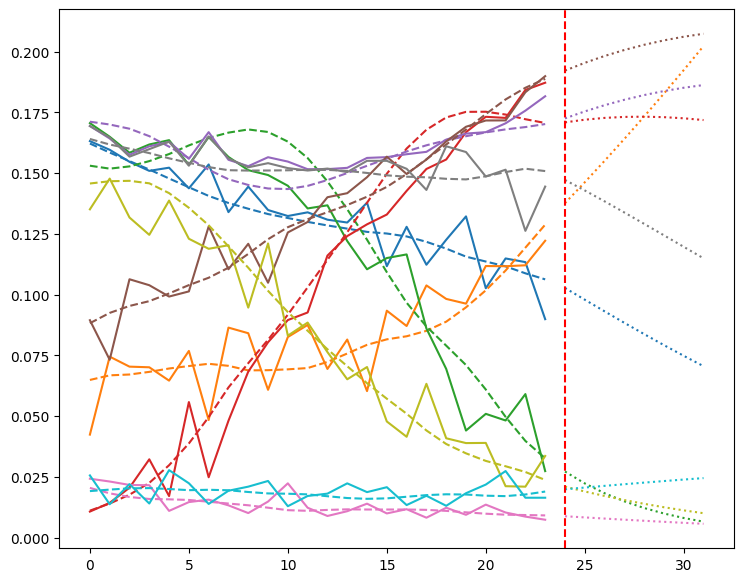

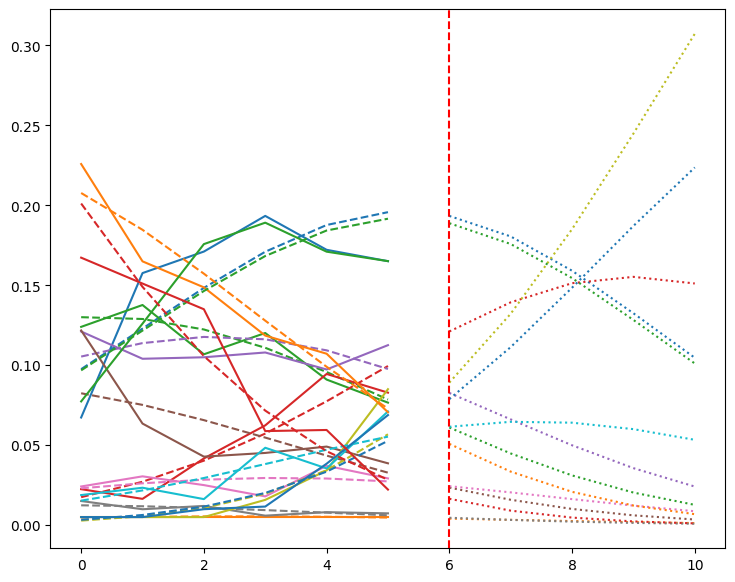

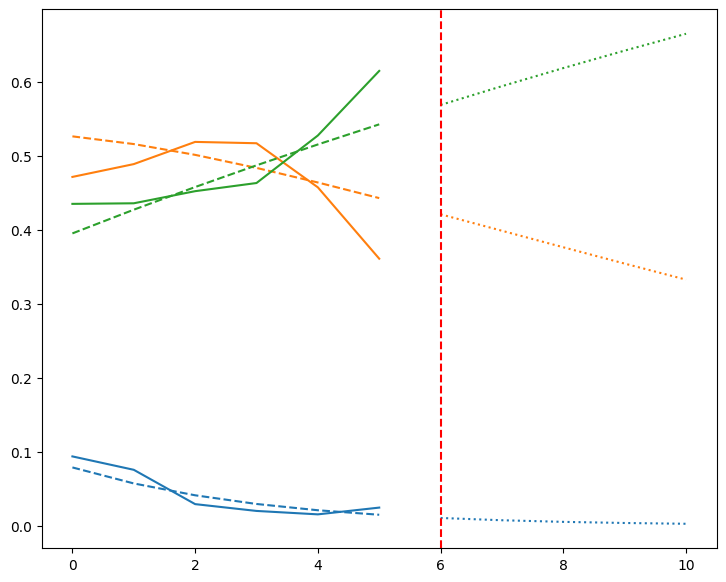

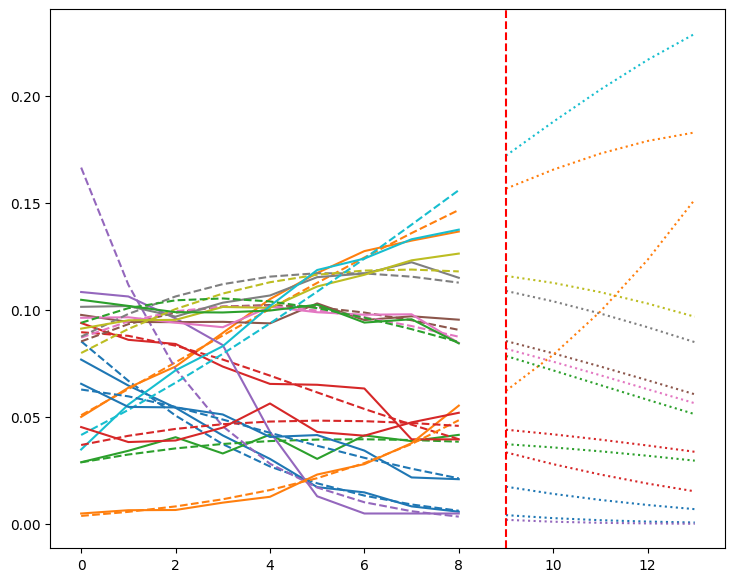

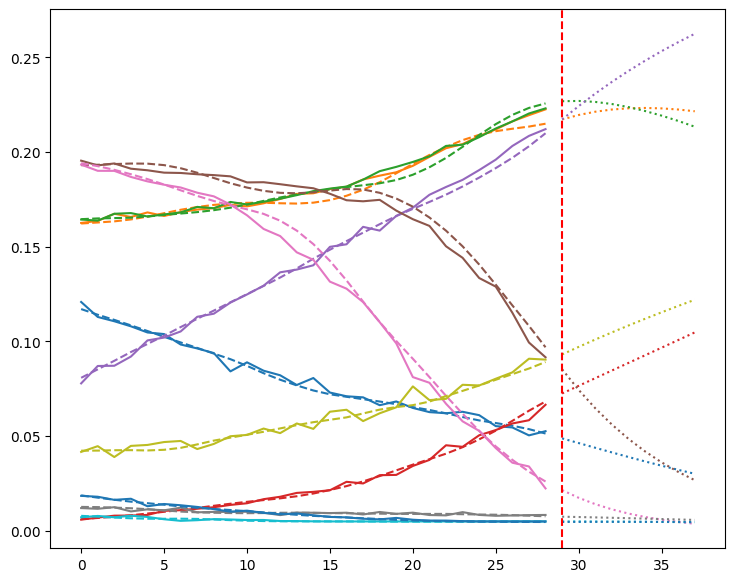

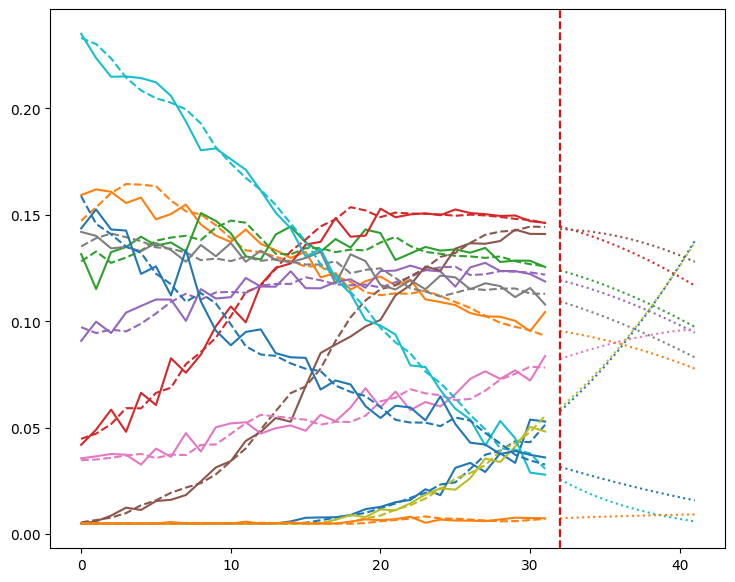

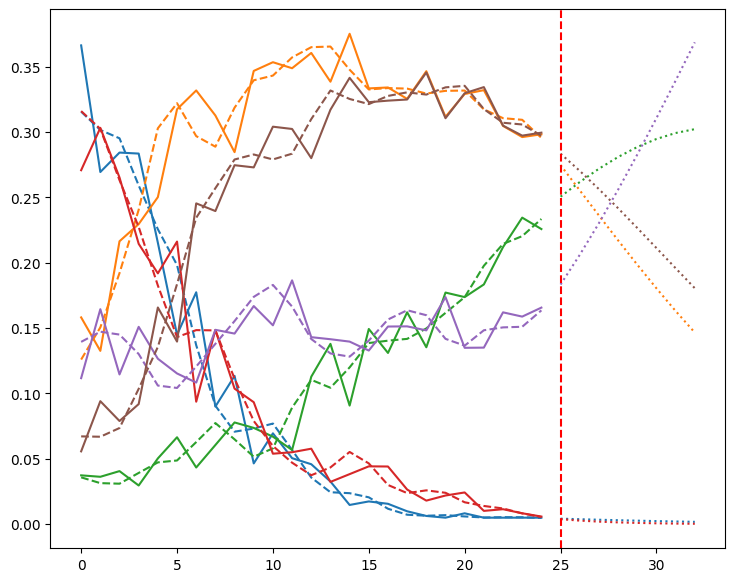

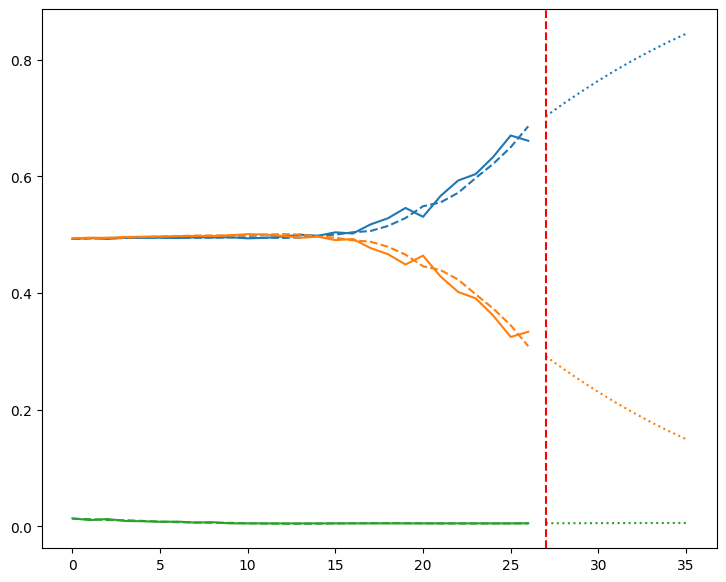

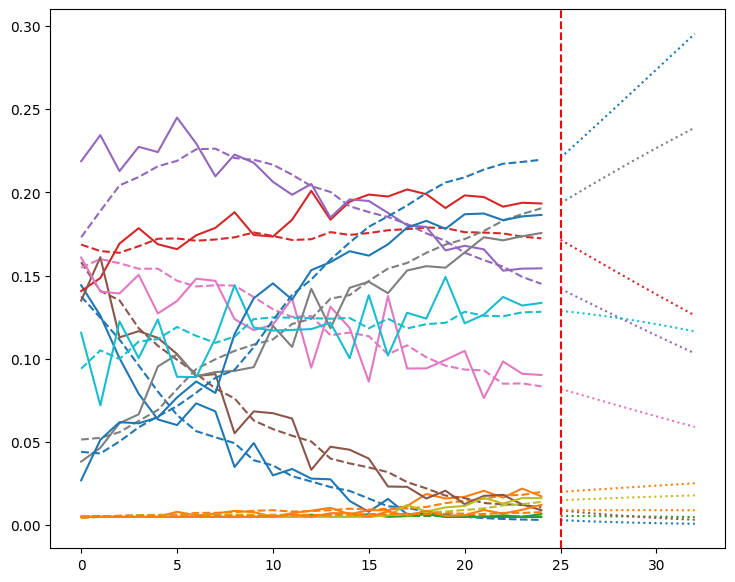

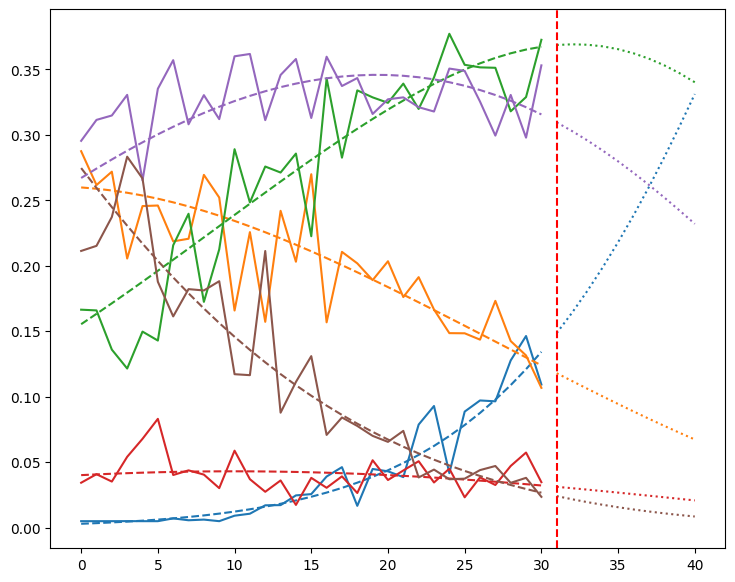

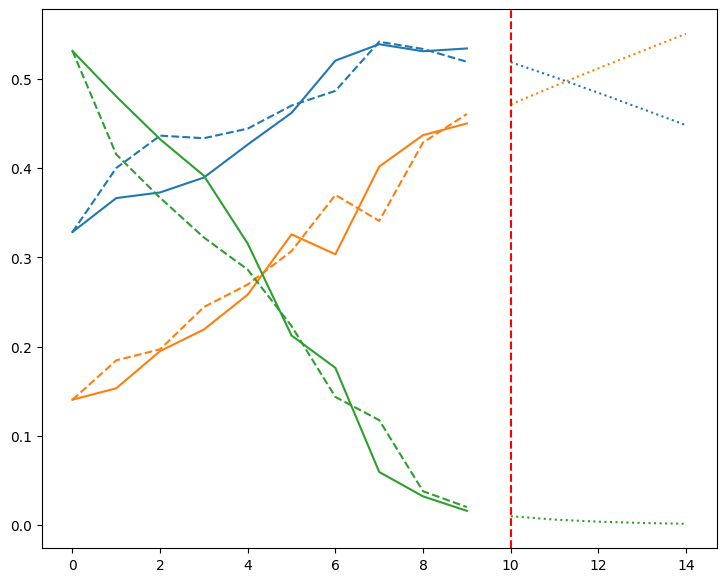

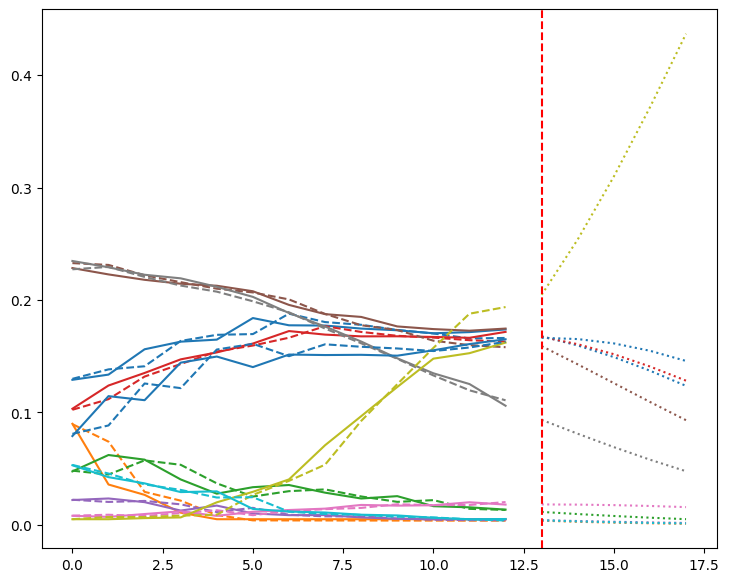

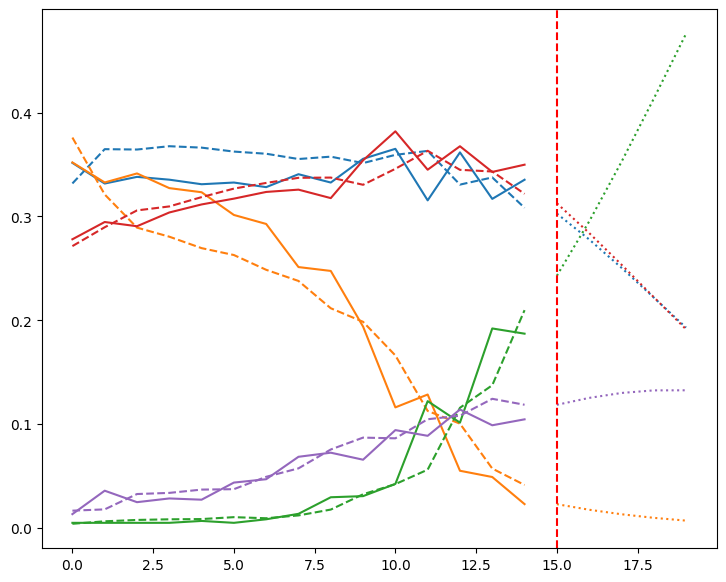

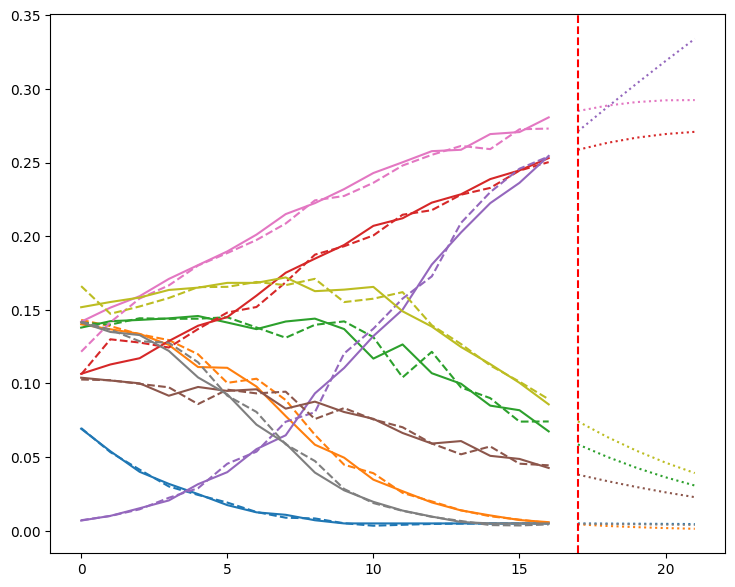

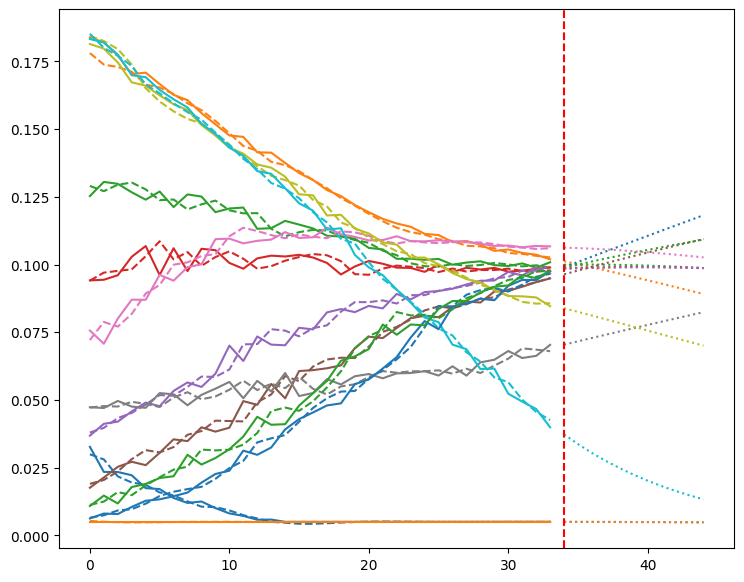

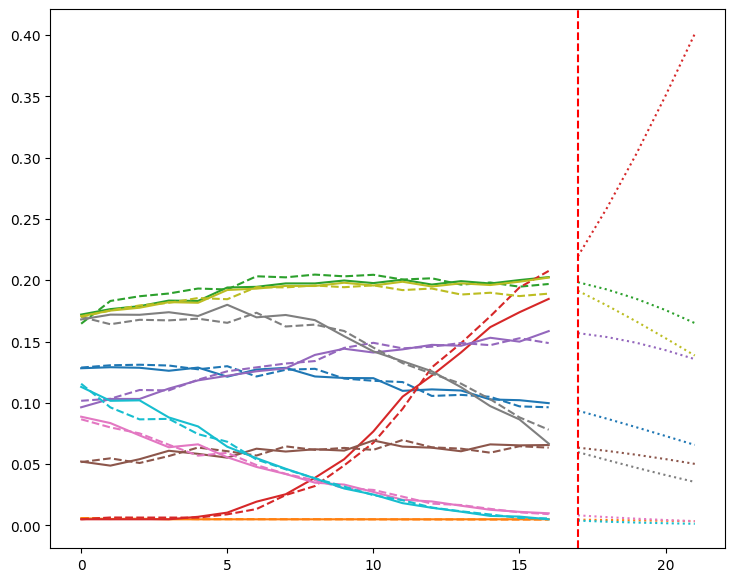

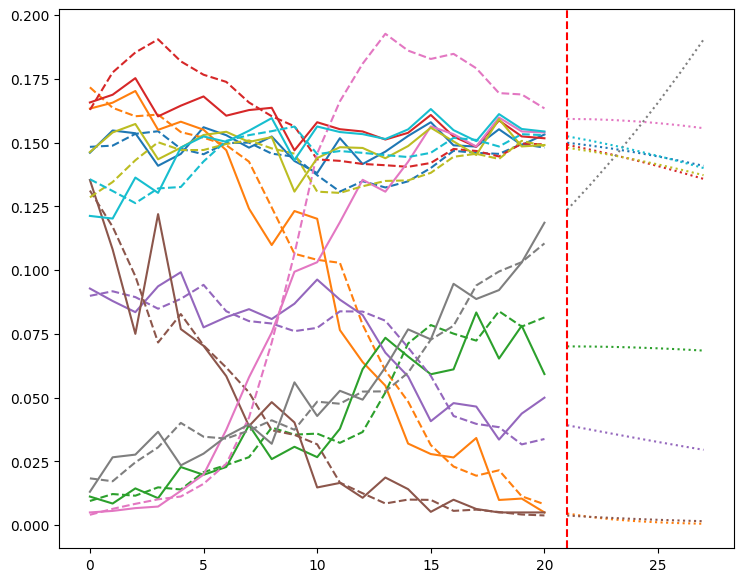

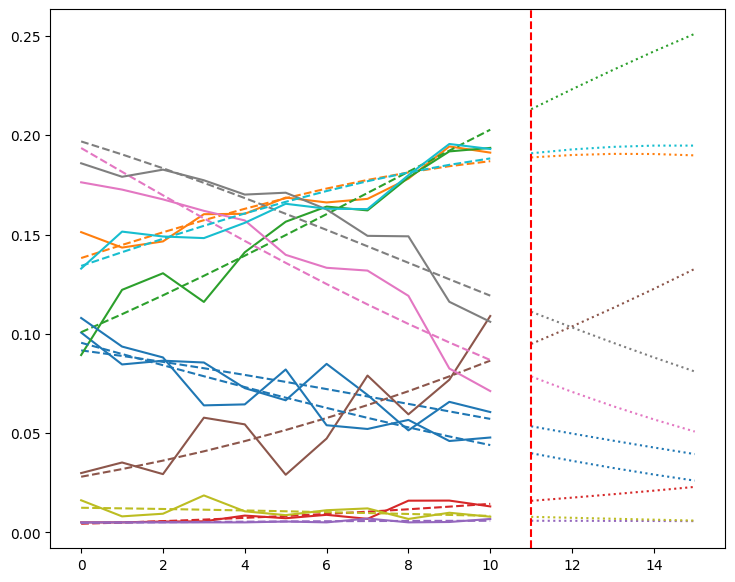

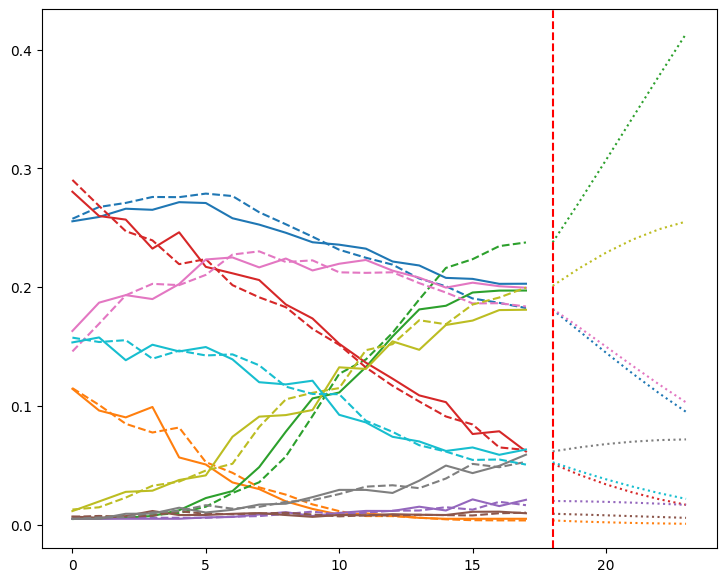

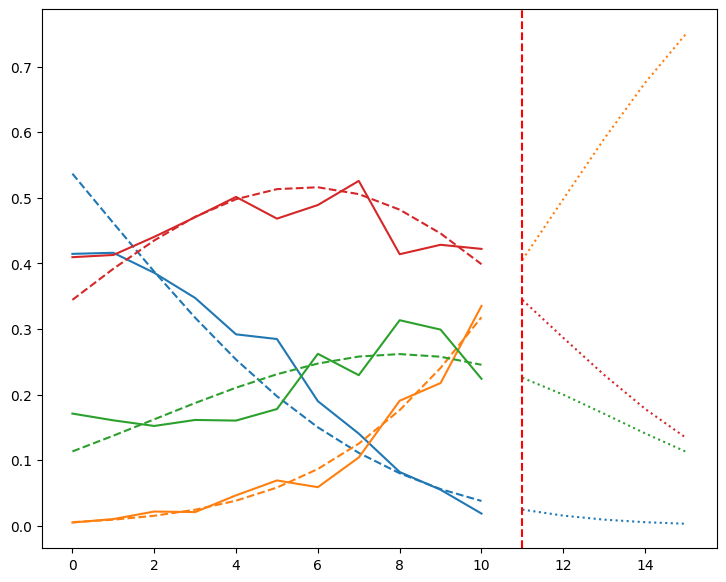

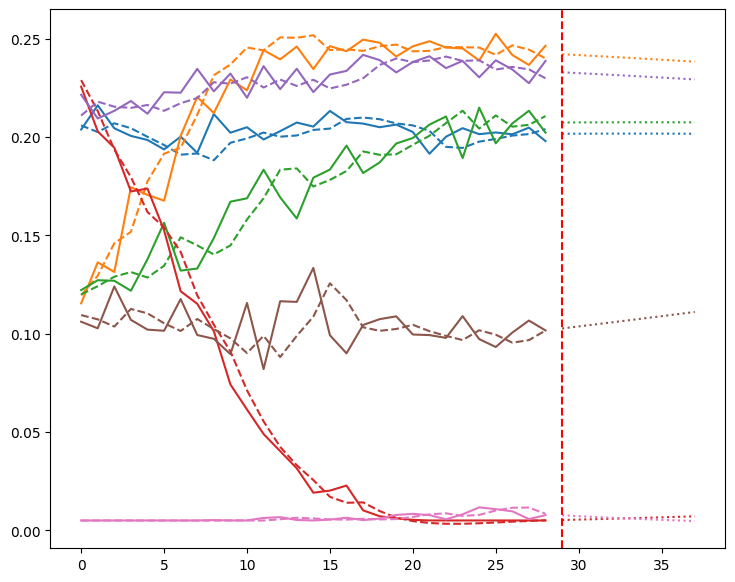

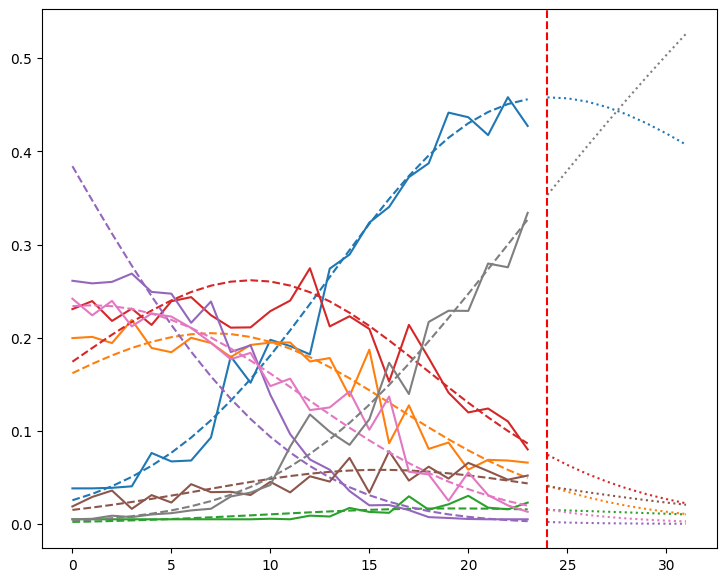

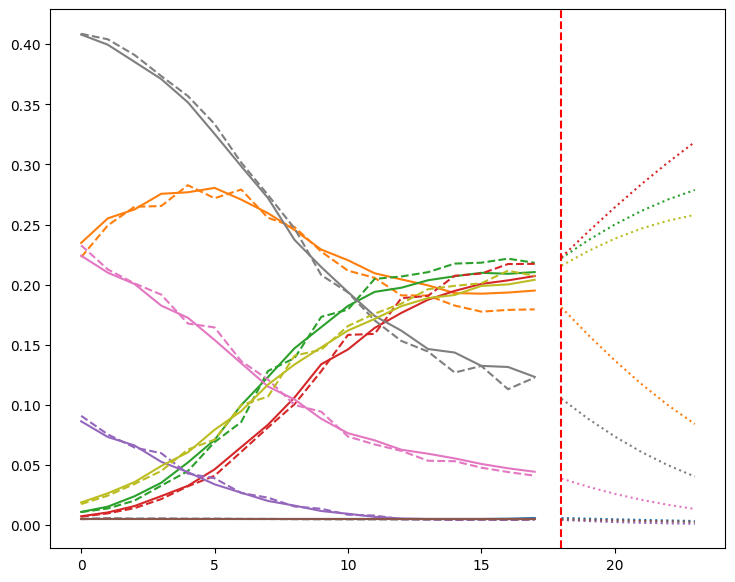

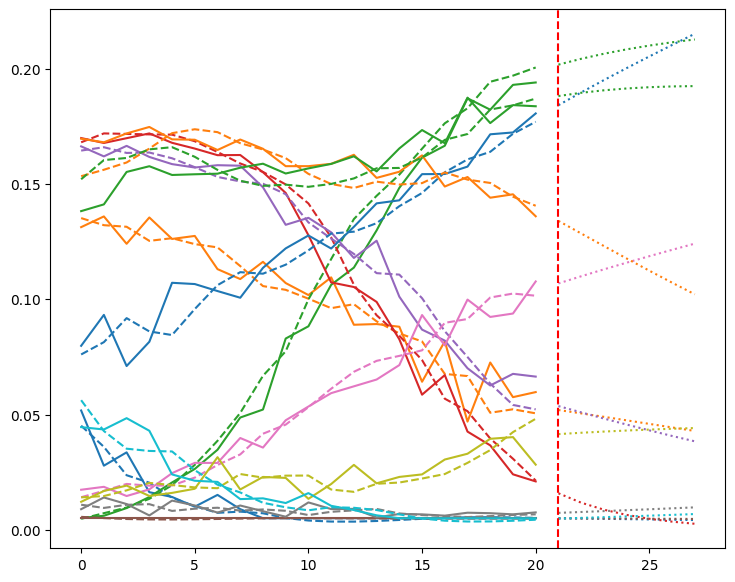

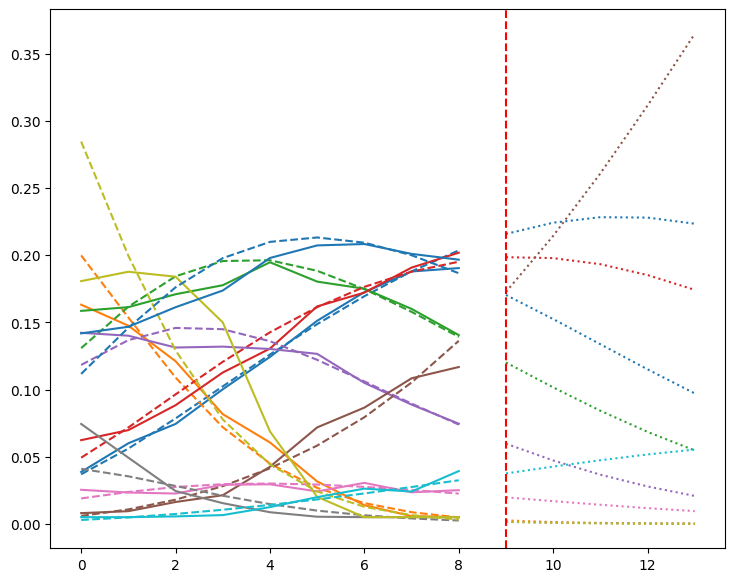

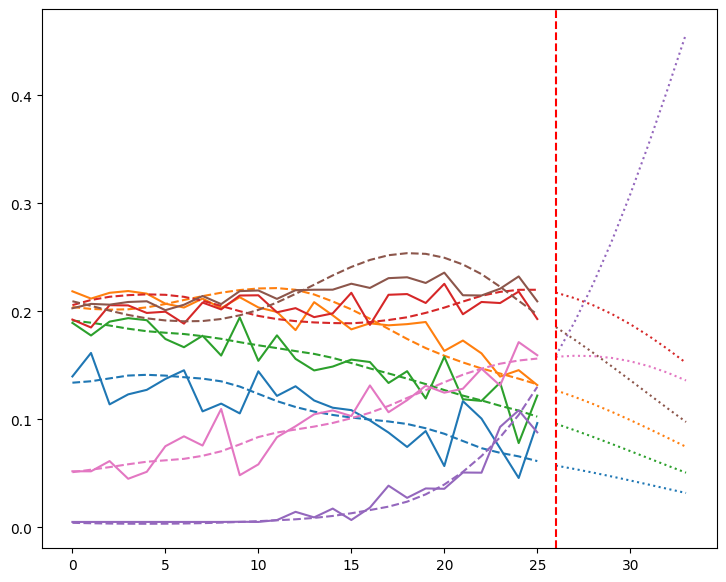

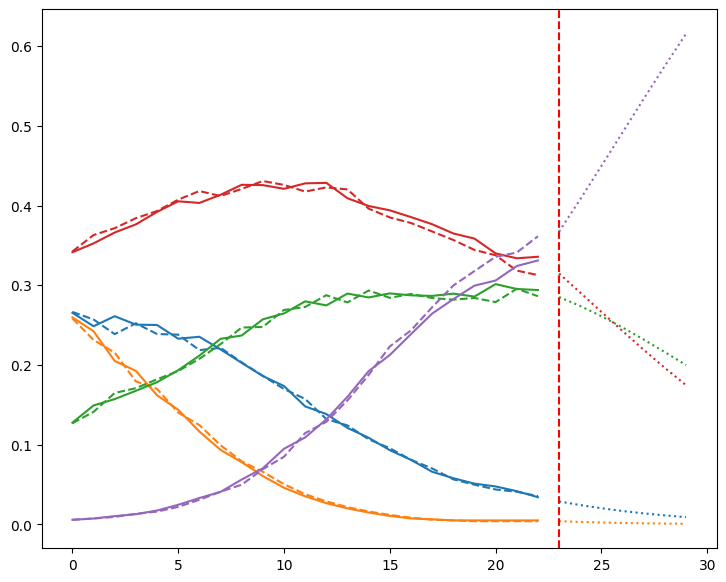

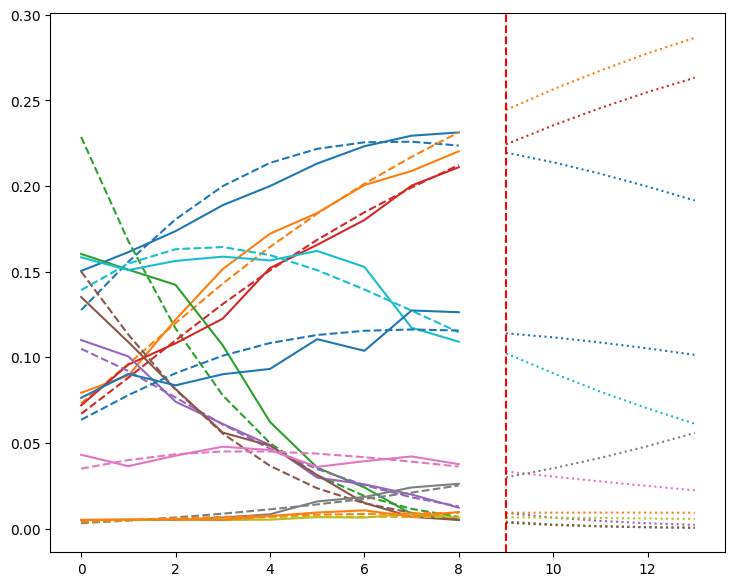

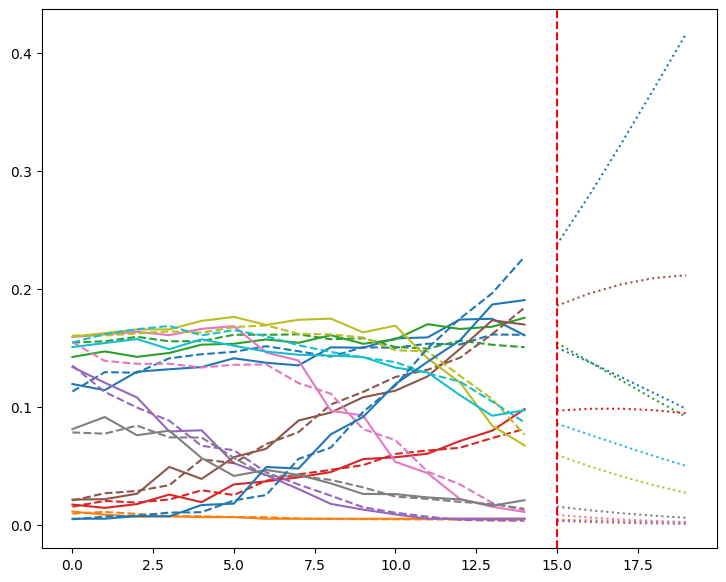

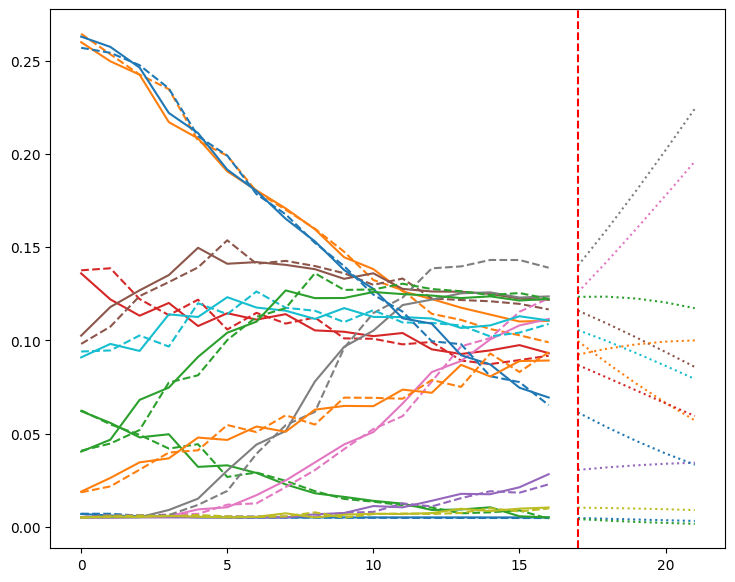

In [4]:
n_plots = 50

np.random.seed(0)

for i in range(n_plots):
    r = np.random.randint(3, 15)
    length = np.random.randint(5, 36)
    noise_std = np.random.uniform(0.01, 0.35)

    horizon = max(5, length // 3)

    time_series = simulate_ts(r, length, noise_std).pipe(preprocess.treat_small, 0.005)

    model = LocalTrendForecaster().fit(time_series)
    predictions = model.predict(horizon)

    plot_time_series(time_series, model.fitted_curve_, predictions)